# Testing the general-purpose `NN_trainer` module for regression task
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

We implemented a [general-purpose trainer module](https://github.com/tirthajyoti/Deep-learning-with-Python/blob/master/utils/NN_trainer.py) for regression task with tabular datasets. The idea is that you can simply read a dataset (e.g. a CSV file), choose the input and target variables, build a densely-connected neural net, train, predict, and save the model for deployment.

- create a trainer object
- read a dataset
- designate input and output variable(s)
- prepare the data (scale, test/train split)
- build a model (choosing number of layers, number of neurons, activation function, etc.)
- train (choosing number of epochs, learning rate, batch size, etc.)
- plot training error over epochs, benchmark against test set predictions
- save the model for deploying downstream

The module exposes simple, intuitive methods which let you do all these tasks one after another. 

Often deep learning models for regression tasks are used further downstream in some other computing or data science flow. Consequently, the module is able to give you back a prediction function (trained) which can be used for any further prediction, analytics, or optimization task.

This notebook tests the general-purpose trainer module and demonstrates various methods available within the module, with a synthetically generated dataset. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

### Make some synthetic data using the `make_regression()` function from Scikit-learn

In [2]:
data1 = make_regression(n_samples=200, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=2.0, shuffle=True, coef=False, random_state=None)
df1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
df1['y'] = data1[1]

In [3]:
df1.head()

,x1,x2,x3,x4,y
0,-2.106723,0.209264,-0.796563,-1.089854,-11.619181
1,1.087843,-0.895292,-0.221989,0.267321,-57.546789
2,0.925311,-0.895518,0.591737,0.049839,-63.496270
3,0.879450,0.468024,-0.498075,0.511755,46.856306
4,0.497282,0.176066,0.159689,0.967688,43.135900


### Create a useless variable

We insert a column of a useless variable into the dataset. This is to show a particular feature of the module which detects such _un-interesting_ variable automatically and eliminates them.

In [4]:
df1['x5'] = -1

In [5]:
df1.head()

,x1,x2,x3,x4,y,x5
0,-2.106723,0.209264,-0.796563,-1.089854,-11.619181,-1
1,1.087843,-0.895292,-0.221989,0.267321,-57.546789,-1
2,0.925311,-0.895518,0.591737,0.049839,-63.496270,-1
3,0.879450,0.468024,-0.498075,0.511755,46.856306,-1
4,0.497282,0.176066,0.159689,0.967688,43.135900,-1


### Import the `Trainer` class from the `NN_trainer` module

In [6]:
from NN_trainer import Trainer

In [7]:
t = Trainer()

### What is this object?

In [8]:
print(t)

Hello, I am a neural net trainer!


### If we want to train something now, an error message appears!

In [9]:
t.train_model()

Model has not been built yet. Cannot train!


### If we want to build a model right now, an error message appears!

In [10]:
t.build_model()

Data preparation not done yet. Should not build a model!


### If we want to prepare data (for modeling), an error message appears!

In [11]:
t.prepare_data()

No data has been read yet. Cannot do processing!


Various types of error-checking code has been built into the module to catch and prevent a task to be performed at a wrong time (e.g. trying to build a model without reading in a dataset)

### Now we copy the synthetic dataset to the trainer object dataset

The `Trainer` object has an internal Pandas DataFrame called `df`. Here, for demo purpose, we are just using an internally generated DataFrame and setting it to this `df`. But this is not usually how you will read in a dataset.

Note that the module provides a `read_csv()` method for reading in a CSV file as a Pandas DataFrame. You will, in most situations, use that method to read in an external dataset (a CSV file) for modeling purpose.

At the initialization, the `df` is set to `None`.

In [12]:
if t.df is None:
    print("Internal dataset is None")

Internal dataset is None


In [13]:
t.df = df1

Now, the internal dataset is a regular Pandas DataFrame

In [14]:
t.df.describe()

,x1,x2,x3,x4,y,x5
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,-0.025659,0.097162,-0.040191,0.019283,7.578908,-1.0
std,1.062170,0.994754,0.944377,1.024934,82.219899,0.0
min,-3.448801,-3.224607,-2.801586,-2.729272,-283.076901,-1.0
25%,-0.766162,-0.495337,-0.637783,-0.682420,-43.339649,-1.0
50%,0.041453,0.150709,-0.093528,0.002418,13.879653,-1.0
75%,0.708254,0.803136,0.563371,0.818226,58.340742,-1.0
max,2.357087,2.704995,2.746394,2.767297,201.867156,-1.0


### We can even create simple scatter plots

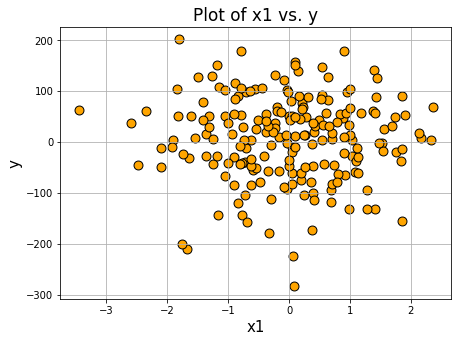

In [15]:
t.plot_xy('x1','y')

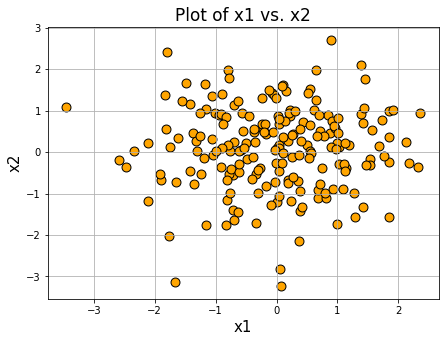

In [16]:
t.plot_xy('x1','x2')

### Now drop the _un-interesting_ variable

In [17]:
t.drop_static_cols()

Dropped the following column: x5


In [19]:
t.show_cols()

Here are the features: x1, x2, x3, x4, and y.

### Trying to set the output variable - spelled it wrong (`v` instead of `y`)

In [20]:
t.set_single_output('v')

Following feature is set as output (to be modeled): v
Warning! The designated output variable v is not in the list of columns of the dataset!


### Setting the correct output variable `y`

In [21]:
t.set_single_output('y')

Following feature is set as output (to be modeled): y


### Setting the input variables

In [22]:
t.set_inputs(['x1','x2','x3','x4'])

Following features are set as input: x1, x2, x3, and x4.

### Preparing the dataset

This is a somewhat automated function. With a single line of code, user can instruct the software to intelligently scale all the input and output variables as per the range of their values, create test/train splits for DNN modeling, and prepare the dataset to be fed into a DNN.

In [23]:
t.prepare_data()

### Build the model
This lets the user build a DNN model of her choice with various configurable parameters (e.g. number of hidden layers, number of neurons in each layer, activation function, etc.)

In [26]:
t.build_model(n_hidden_layers=2,
              layer_architecture=[20, 20])

### Train (fit) the model

This lets the user train the model with configurable parameters (number of epochs, learning rate, batch size, etc.)

In [27]:
t.train_model(lr=5e-4,n_epochs=30,verbose=1)

Epoch 1/30
140/140 [==============================] - 1s 4ms/step - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 2/30
140/140 [==============================] - 0s 756us/step - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 3/30
140/140 [==============================] - 0s 769us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 4/30
140/140 [==============================] - 0s 728us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 5/30
140/140 [==============================] - 0s 762us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 6/30
140/140 [==============================] - 0s 748us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 7/30
140/140 [==============================] - 0s 740us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 8/30
140/140 [==============================] - 0s 733us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 9/30
140/140 [==============================] - 0s 869us/step - loss: 8.3629e-04 - mean_squared_erro

### Plot the training error

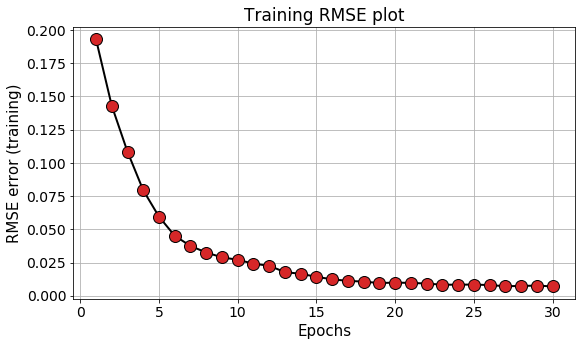

In [28]:
t.plot_training_error()

### Run a benchmark test (plots the test set ground truth against the predictions)

This function computes and plots the test set performance against the ground truth (the true values of the test set). This feature is provided for a **one-shot visual check of the effectiveness of the model**. If the data scientist/ML engineer does not like the model performance, (s)he can just look at this plot and re-build and re-train the model.

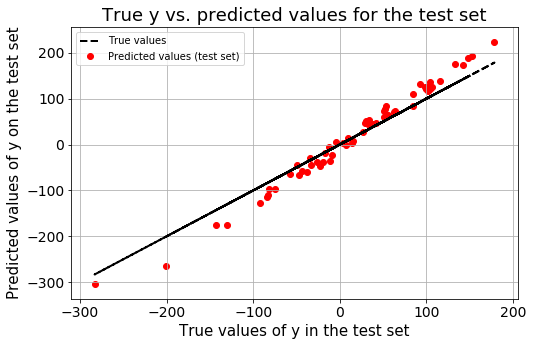

In [29]:
t.benchmark_test()

### Calculate the root-mean-square-error (RMSE) of the test set predictions

In [30]:
t.rmse_test()

23.53

### We can also calculate RMSE for any given test set

In [32]:
# We take a random sample of 25 data points from the dataset
df1 = t.df.sample(25)

In [33]:
sample_test_x = df1[['x1','x2','x3','x4']]
sample_test_y = df1['y']

In [34]:
t.rmse_error(sample_test_x,sample_test_y)

16.489026307342172

There is also a method for mean-absolute-error (MAE) calculation - `mae_error()` 

### Model summary in simple English

In [35]:
t.model_in_plain_english()

Here is the model description
Layer No. 1
Number of neurons: 20
Activation function: relu
----------------------------------------
Layer No. 2
Number of neurons: 20
Activation function: relu
----------------------------------------
Layer No. 3 (output layer)
Layer No. 3
Number of neurons: 1
Activation function: linear
----------------------------------------
In total, there are 541 parameters in this model!



### Keras-style model summary

In [36]:
t.model_summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
None


### Save the trained model (with a default name)

In [37]:
t.save_model()

### Save the trained model with an user-supplied name

In [38]:
t.save_model("My_model.h5")